# Trabalho #1 - Classificação binária de pontos no plano com RNA rasa

Nese trabalho iremos construir uma RNA rasa com uma única camada intermediária para classificar pontos de duas classes diferentes no plano. O objetivo desse trabalho é entender como funciona uma RNA e o seu treinamento usando o método do Gradiente Descendente.

**Nesse trabalho você irá apreender como:**

- Implementar uma RNA rasa para realizar classificação binária
- Calcular a função de custo logistica (entropia cruzada)
- Implementar a propagação para frente e a retro-propagação usando uma codificação simples sem vetorização nos exemplos

## Coloque o seu nome e RA:

Aluno: Rodrigo Franciozi Rodrigues da Silva

RA: 20.83984-7

## 1 - Pacotes ##

Em primeiro lugar é necessário importar alguns pacotes do Python que serão usados nesse trabalho:
- [numpy](www.numpy.org) pacote de cálculo científico com Python
- [sklearn](http://scikit-learn.org/stable/) fornece ferramentes eficientes e simples para análise de dados, usada nesse trabalho para gerar os dados de treinamento
- [matplotlib](http://matplotlib.org) biblioteca para gerar gráficos em Python

In [1]:
# Importação dos pacotes
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets

np.random.seed(1) # define uma semente para geração de números aleatórios

## 2 - Conjunto de dados ##

Execute a célula abaixo para carregar o conjunto de dados de pontos no plano com um formato de de duas luas novas entrelaçadas nas variáveis `X`e `Y`.

In [2]:
# Define número de exemplos e chama função para gerar os dados
m = 600
data = sklearn.datasets.make_moons(n_samples=m, noise=.2)

# Recupera dados de entrada e de saída do conjunto de dados
X, Y = data
X, Y = X.T, Y.reshape(1, Y.shape[0])

Execute a célula abaixo para fazer um gráfico dos dados.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


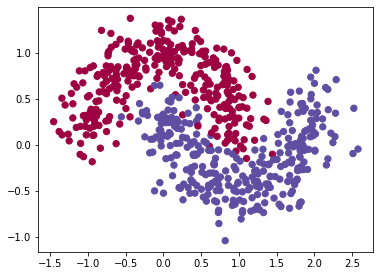

In [3]:
# Visualização dos dados
plt.figure(figsize=(6, 4.5))
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
ax = plt.axes()
plt.show()

### Exercício #1:

Os dados consistem em:
    
- um tensor Numpy (matriz) `X`  que contém as coordenadas dos pontos  (x1, x2) para todos os exemplos
- um tensor Numpy (vetor) `Y` que contém as classes (vermelho:0, azul:1) para todos os exemplos

Vamos primeiramente analisar os dados.

Na célula abaixo crie um código que verifica quantos exemplos de treinamento existem e as dimensões (`shape`) das variavéis  `X` and `Y`. 

**Dica**: Como obter as dimensões de um tensor numpy? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [5]:
# PARA VOCÊ FAZER: Verificar dimensões do dados

# Insira seu programa aqui
shape_X = X.shape
shape_Y = Y.shape

print ('A dimensão de X é: ' + str(shape_X))
print ('A dimensão de Y é: ' + str(shape_Y))
print ('Existem m = %d exemplos de treinamento' % (m))

A dimensão de X é: (2, 600)
A dimensão de Y é: (1, 600)
Existem m = 600 exemplos de treinamento


**Saída esperada**:

    A dimensão de X é: (2, 600)
    A dimensão de Y é: (1, 600)
    Existem m = 600 exemplos de treinamento

## 3 - Codificação da RNA

### 3.1 - Definição da estrutura da RNA ####

### Exercício #2: 

Na célula abaixo modifique a função `layer_sizes` para definir três variáveis:

- `n_x` = número de entradas de cada exemplo
- `n_h` = número de neurônios da camada intermediária
- `n_y` = número de saídas da RNA

**Dica**: use as dimensões de `X` e `Y` para achar `n_x` e `n_y`. Além disso defina o número de neurônios da camada intermediária como sendo igual a 4.

In [6]:
# PARA VOCÊ FAZER: dimensões da RNA

def layer_sizes(X, Y):
    """
    Argumentos:
    X = conjunto de dados de entrada (dimensão: número de entradas, numero de exemplos))
    Y = classes dos dados (dimensão: número de saídas, numero de exemplos)
    
    Retorna:
    n_x = número de entradas
    n_h = número de neurônios da camada escondida
    n_y = número de saídas
    """
    n_x = shape_X[0]
    n_h = 4
    n_y = shape_Y[0] 
    
    return (n_x, n_h, n_y)

Execute a célula abaixo para testar a sua função `layer_sizes`.

In [7]:
n_x, n_h, n_y = layer_sizes(X, Y)
print("Número de entradas: n_x = ", n_x)
print("Número de neurônios da camada escondida: n_h = ", n_h)
print("Número de saídas: n_y = ", n_y)

Número de entradas: n_x =  2
Número de neurônios da camada escondida: n_h =  4
Número de saídas: n_y =  1


**Saída esperada:**

    Número de entradas: n_x = 2
    Número de neurônios da camada escondida: n_h = 4
    Número de saídas: n_y = 1


### 3.2 - Initialização dos parâmetros ####

### Exercício #3: 

Implemente a função `inicializa_parametros()` na célula abaixo.

**Instruções**:
- Garanta que as dimensões dos seus parâmetros esteja correta. Veja as notas de aula.
- Os pesos das ligações são inicializados com números aleatórios pequenos.
- Multiplique os números aleatórios gerados por 0,01 para ter números pequenos.
- Os vieses dos neurônios são inicilizados com zeros.
- Use a função `np.random.random` para gerar números aleatórios com distribuição uniforme. Multiplique os números aleatórios por 0,01 para ter números pequenos.

In [12]:
# PARA VOCÊ FAZER: inicialização dos parâmetros da RNA

def inicializa_parametros(n_x, n_h, n_y):
    """
    Argumentos:
    n_x = número de entradas
    n_h = número de neurônios da camada escondida
    n_y = número de saídas
    
    Retorna:
    W1 = matriz de pesos de dimensão (n_h, n_x)
    b1 = vetor de vieses de dimensão (n_h, 1)
    W2 = matriz de pesos de dimensão (n_y, n_h)
    b2 = vetor de vieses de dimensão (n_y, 1)
    """
    
    np.random.seed(2) # define semente para geração de números aleatórios de forma a uniformizar os resultados.
    
    W1 = np.random.random((n_h, n_x)) * 0.01 
    b1 = np.zeros((n_h, 1))
    W2 = np.random.random((n_y, n_h)) * 0.01 
    b2 = np.zeros((n_y, 1)) 

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    return (W1, b1, W2, b2)

Execute a célula abaixo para testar a sua função 

In [13]:
W1, b1, W2, b2 = inicializa_parametros(n_x, n_h, n_y)
print("W1 = ", W1)
print("b1 = ", b1)
print("W2 = ", W2)
print("b2 = ", b2)

W1 =  [[0.00435995 0.00025926]
 [0.00549662 0.00435322]
 [0.00420368 0.00330335]
 [0.00204649 0.00619271]]
b1 =  [[0.]
 [0.]
 [0.]
 [0.]]
W2 =  [[0.00299655 0.00266827 0.00621134 0.00529142]]
b2 =  [[0.]]


**Saída esperada**:

    W1 =  [[0.00435995 0.00025926]
     [0.00549662 0.00435322]
     [0.00420368 0.00330335]
     [0.00204649 0.00619271]]
    b1 =  [[0.]
     [0.]
     [0.]
     [0.]]
    W2 =  [[0.00299655 0.00266827 0.00621134 0.00529142]]
    b2 =  [[0.]]

### 3.3 - Propagação para frente ####

### Exercício #4: 

Implemente a função `sigmoide()` para usá-la como função de ativação da camada de saída da rede.

Essa função tem que estar preparada para receber um tensor como entrade de retornar um tensor.

In [27]:
# PARA VOCÊ FAZER: função sigmoide

def sigmoide(x):
    """
    Argumentos: x = tensor de entrada
    Retorna: s = sigmoide(x)
    """
    
    s = 1/(1+ np.exp(-x))
    
    return s

Execute a célula abaixo para testar a sua função `sigmoide()`.

In [28]:
t = np.linspace(-1.0, 1.0, num=5)
s = sigmoide(t)
print('Vetor de entrada =', t)
print('Sigmoide =', s)

Vetor de entrada = [-1.  -0.5  0.   0.5  1. ]
Sigmoide = [0.26894142 0.37754067 0.5        0.62245933 0.73105858]


**Saída esperada:**

    Vetor de entrada = [-1.  -0.5  0.   0.5  1. ]
    Sigmoide = [0.26894142 0.37754067 0.5        0.62245933 0.73105858]

### Exercício #5: 

Implemente a função `forward_propagation()` que processa um único exemplo de treinamento. 

**Instruções**:

- Como função de ativação da camada de saída use a função `sigmoid()` que você criou no exercício #4. 
- Como função de ativação da camada intermediária use a função `np.tanh()`, que faz parte da bilioteca Numpy.
- Codifique a propagação para frente, ou seja, calcule $z^{[1]}, a^{[1]}, z^{[2]}$ and $a^{[2]}$ para cada exemplo do conjunto de dados de treinamento.
    
Para auxiliar, as equações que implementam a propagação para frente vistas em aula estão repetidas abaixo. As equações não vetorizadas nos exemplos devem ser utilizadas no seu programa.

$$\boldsymbol{z}^{[1](i)} = \boldsymbol{W}^{[1]}\boldsymbol{x}^{(i)} + \boldsymbol{b}^{[1]}$$

$$\boldsymbol{a}^{[1](i)} = g^{[1]}(\boldsymbol{z}^{[1](i)})$$

$$z^{[2](i)} = \boldsymbol{W}^{[2]}\boldsymbol{a}^{[1](i)} + b^{[2]}$$
  
$$a^{[2](i)} = g^{[2]}(z^{[2](i)})$$


In [32]:
# PARA VOCÊ FAZER: propagação para frente para cada exemplo de treinamento

def forward_propagation(x, W1, b1, W2, b2):
    """
    Argumentos:
    x = dados de entrada de um exemplo com dimensão (n_x, 1)
    W1 = matriz de pesos de dimensão (n_h, n_x)
    b1 = vetor de vieses de dimensão (n_h, 1)
    W2 = matriz de pesos de dimensão (n_y, n_h)
    b2 = vetor de vieses de dimensão (n_y, 1)
    
    Retorna:
    z1 = estados dos neurônios da camada intermediária de dimensão (n_h, 1)
    a1 = ativações dos neurônios da camada intermediária de dimensão (n_h, 1)
    z2 = estado do neurônio da camada de saída de dimensão (n_y ,1)
    a2 = ativação do neurônio da camada de saída (saída da rede) de dimensão (n_y ,1)
    """
    # Garante que dimensões dos dados de entrada são de fato um vetor de nx linhas e uma coluna
    n_x = x.shape[0]
    x = np.reshape(x, (n_x, 1))
       
    z1 = np.dot(W1,x) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = sigmoide(z2) 
    
    # Verifica dimensão de a2
    assert(a2.shape == (1, x.shape[1]))
    
    return (z1, a1, z2, a2)

Execute a célula abaixo para testar a sua função `forward_propagation()`.

In [33]:
z1, a1, z2, a2 = forward_propagation(X[:,0], W1, b1, W2, b2)

# Nota: usaremos a média somente para verificar os resultados.
print('z1 =', z1)
print('a1 =', a1)
print('z2 =', z2)
print('a2 =', a2)

z1 = [[ 0.00396995]
 [ 0.00239743]
 [ 0.00185025]
 [-0.00206823]]
a1 = [[ 0.00396993]
 [ 0.00239742]
 [ 0.00185025]
 [-0.00206823]]
z2 = [[1.88417269e-05]]
a2 = [[0.50000471]]


**Saída esperada**:

    z1 = [[ 0.00396995]
     [ 0.00239743]
     [ 0.00185025]
     [-0.00206823]]
    a1 = [[ 0.00396993]
     [ 0.00239742]
     [ 0.00185025]
     [-0.00206823]]
    z2 = [[1.88417269e-05]]
    a2 = [[0.50000471]]

### 3.4 - Função de erro ####

Dado que a saída da RNA, $a^{[2]}$, já foi calculada e está na variável `a2`, que contém a saída $a^{[2](i)}$ de um exemplo de treinamento, a função de erro logística, conforme visto na aula, é calculada da seguinte forma:

$$L = - \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small$$

### Exercício #6: 

Implemente a função `logistica()` para calcular $L$. Use a função numpy `np.log` da biblioteca numpy para calcular o logarítmo neperiano de um número real.

In [36]:
# PARA VOCÊ FAZER: cálculo da função de erro logística

def logistica(a2, y):
    """
    Calcula o custo entropia-cruzada
    
    Argumentos:
    a2 = saída da RNA (escalar)
    y = classe real do exemplo (escalar)
    
    Retorna:
    erro = função logística
    """
    
    erro = -(y*np.log(a2) + ((1-y)*np.log(1-a2))) 
    
    erro = np.squeeze(erro) # para ter certeza de que as dimensões estão corretas

    return erro

Execute a célula abaixo para testar a sua função `logistica()`.

In [37]:
print("Erro = " + str(logistica(a2, Y[0][0])))

Erro = 0.6931377597408849


**Saída esperada**:

    Erro = 0.6931377597408849

### 3.5 - Retro-propagação ####

Usando os resultados da propagação para frente para um exemplo de treinamento, pode-se implementar a retro propagação para esse exemplo.

### Exercício #7: 

Implemente a função `backward_propagation()`.

**Instruções**:
A retro propagação é a parte mais difícil de se calcular nas RNAs. Para auxiliar, as equações que implementam a retro-propagação vistas em aula estão repetidas abaixo. As equações não vetorizadas nos exemplos devem ser utilizadas no seu programa.

$$dz^{[2](i)} = a^{[2](i)} - y^{(i)}$$
  
$$d\boldsymbol{W}^{[2](i)} = dz^{[2](i)} \boldsymbol{a}^{[1](i)T}$$

$$db^{[2](i)} += dz^{[2](i)}$$

$$d\boldsymbol{z}^{[1](i)} = \boldsymbol{W}^{[2]T}dz^{[2](i)}*\frac{dg^{[1]}(\boldsymbol{z}^{[1](i)})}{dz}$$

$$d\boldsymbol{W}^{[1](i)} = d\boldsymbol{z}^{[1](i)} \boldsymbol{x}^{(i)T}$$ 
 
$$d\boldsymbol{b}^{[1](i)} = d\boldsymbol{z}^{[1](i)}$$ 
 

- Note que o símbolo "$*$" denota multiplicação elemento por elemento.


- Dicas: 
    - Para calcular $d\boldsymbol{z}^{[1](i)}$ é necessário calcular $\frac{dg^{[1]}(\boldsymbol{z}^{[1](i)})}{dz}$.
    - Como $g^{[1]}(.)$ é a função de ativação `tanh` e $a^{[1](i)} = g^{[1]}(z^{[1](i)})$, então 
    $\frac{dg^{[1]}(z^{[1](i)})}{dz} = 1 - (a^{[1](i)})^2$. 
    - Portanto, pode-se calcular 
    $\frac{dg^{[1]}(z^{[1](i)})}{dz}$ usando `(1 - np.power(a1, 2))`.
    
    
- Note que no caso dessa função de retro-propagação você não precisa acumular as somas dos gradientes, pois esse cálculo é feito para um único exemplo de treinamento. A somatória é realizada posteriormente.    

In [38]:
# PARA VOCÊ FAZER: retro-propagação

def backward_propagation(x, y, z1, a1, z2, a2, W2):
    """
    Implemente a retro-propagação usando as equações acima.
    
    Argumentos:
    x = entrada de um exemplo com dimensão (2, 1)
    y = saída da classe real de um exemplo (escalar)
    z1 = estados dos neurônios da camada intermediária de dimensão (n_h, 1)
    a1 = ativações dos neurônios da camada intermediária e dimensão (n_h, 1)
    z2 = estado do neurônio da camada de saída de dimensão (n_y ,1)
    a2 = ativação do neurônio da camada de saída de dimensão (n_y ,1)
    W2 = matriz de pesos da camada de saída de dimensão (n_y, n_h)
    
    Retorna:
    dW1 = matriz de gradientes dos pesos de dimensão para um exemplo de treinamento (n_h, n_x)
    db1 = vetor de gradientes dos vieses de dimensão para um exemplo de treinamento (n_h, 1)
    dW2 = matriz de gradientes dos pesos de dimensão para um exemplo de treinamento (n_y, n_h)
    db2 = vetor de gradientes dos vieses de dimensão para um exemplo de treinamento (n_y, 1)
    """
        
    # Garante que dimensões de x estão corretas
    n_x = x.shape[0]
    x = np.reshape(x, (n_x, 1))
    
    dz2 = a2 - y
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis = 1,keepdims = True)
    dz1 = np.dot(W2.T,dz2) * (1 - np.power(a1,2) )
    dW1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis =1, keepdims = True)
    
    
    return dW1, db1, dW2, db2

Execute a célula abaixo para testar a sua função `backward_propagation()`.

In [39]:
dW1, db1, dW2, db2 = backward_propagation(X[:,0], Y[0][0], z1, a1, z2, a2, W2)
print ("dW1 = ", dW1)
print ("db1 = ", db1)
print ("dW2 = ", dW2)
print ("db2 = ", db2)

dW1 =  [[-0.00142191  0.00097027]
 [-0.00126616  0.00086399]
 [-0.00294743  0.00201124]
 [-0.0025109   0.00171337]]
db1 =  [[-0.00149824]
 [-0.00133412]
 [-0.00310563]
 [-0.00264567]]
dW2 =  [[-0.00198495 -0.0011987  -0.00092512  0.0010341 ]]
db2 =  [[-0.49999529]]


**Saída esperada**:

    dW1 =  [[-0.00142191  0.00097027]
     [-0.00126616  0.00086399]
     [-0.00294743  0.00201124]
     [-0.0025109   0.00171337]]
    db1 =  [[-0.00149824]
     [-0.00133412]
     [-0.00310563]
     [-0.00264567]]
    dW2 =  [[-0.00198495 -0.0011987  -0.00092512  0.0010341 ]]
    db2 =  [[-0.49999529]]

### 3.6 - Atualização dos parâmetros ####

### Exercício #8:

Implemente a atualização dos parâmetros. Deve-se usar `dJdW1`, `dJdb1`, `dJdW2` e `dJdb2` para atualizar `W1`, `b1`, `W2` e `b2`.

Equação geral do gradiente descendente: 

$$\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$$

onde $\alpha$ é a taxa de aprendizagem e $\theta$ representa um parâmetro genérico da rede.

In [40]:
# PARA VOCÊ FAZER: atualização dos parâmetros

def update_parameters(W1, b1, W2, b2, dJdW1, dJdb1, dJdW2, dJdb2, learning_rate = 1.2):
    """
    Atualização dos parâmetros usando a regra do gradiente descendente
    
    Argumentos:
    W1 = matriz de pesos de dimensão (n_h, n_x)
    b1 = vetor de vieses de dimensão (n_h, 1)
    W2 = matriz de pesos de dimensão (n_y, n_h)
    b2 = vetor de vieses de dimensão (n_y, 1)
    dJdW1 = matriz de gradientes dos pesos de dimensão para todos exemplos de treinamento (n_h, n_x)
    dJdb1 = vetor de gradientes dos vieses de dimensão para todos exemplos de treinamento (n_h, 1)
    dJdW2 = matriz de gradientes dos pesos de dimensão para todos exemplos de treinamento (n_y, n_h)
    dJdb2 = vetor de gradientes dos vieses de dimensão para todos exemplos de treinamento (n_y, 1)
        
    Retorna parametros atualizados:
    W1 = matriz de pesos de dimensão (n_h, n_x)
    b1 = vetor de vieses de dimensão (n_h, 1)
    W2 = matriz de pesos de dimensão (n_y, n_h)
    b2 = vetor de vieses de dimensão (n_y, 1)
    """

    W1 = W1 - learning_rate*dJdW1
    b1 = b1 - learning_rate*dJdb1
    W2 = W2 - learning_rate*dJdW2
    b2 = b2 - learning_rate*dJdb2

    return W1, b1, W2, b2

Execute a célula abaixo para testar a sua função `update_parameters()`.

In [41]:
# Nesse momento utilizamos os gradientes dos parâmetros para um único exemplo somente 
# para podermos testar a função update parâmetros
dJdW1 = dW1
dJdb1 = db1
dJdW2 = dW2
dJdb2 = db2

W1_n, b1_n, W2_n, b2_n = update_parameters(W1, b1, W2, b2, dJdW1, dJdb1, dJdW2, dJdb2) 

print("W1 = ", W1_n)
print("b1 = ", b1_n)
print("W2 = ", W2_n)
print("b2 = ", b2_n)

W1 =  [[ 0.00606625 -0.00090507]
 [ 0.00701601  0.00331644]
 [ 0.00774059  0.00088986]
 [ 0.00505957  0.00413667]]
b1 =  [[0.00179788]
 [0.00160094]
 [0.00372676]
 [0.00317481]]
W2 =  [[0.00537848 0.00410671 0.00732148 0.0040505 ]]
b2 =  [[0.59999435]]


**Saída esperada**:

    W1 =  [[ 0.00606625 -0.00090507]
     [ 0.00701601  0.00331644]
     [ 0.00774059  0.00088986]
     [ 0.00505957  0.00413667]]
    b1 =  [[0.00179788]
     [0.00160094]
     [0.00372676]
     [0.00317481]]
    W2 =  [[0.00537848 0.00410671 0.00732148 0.0040505 ]]
    b2 =  [[0.59999435]]

### 3.7 - Integração das tarefas 3.1 a 3.6 na função rna() ####

### Exercício #9:

Programe a sua rede neural na função `rna()`. Inclua tanto a propagação para frente como a retro propagação. A sua rede deve seguir o Algoritmo 1 da Aula 4 - Classificação binária com RNA rasa, que em linhas gerais é o seguinte:

 `Inicializa parâmetros 
  for e=1 to n_epocas
     zera gradientes
     Iniciliza função de custo com zero
     for i=1 to m
         Calcula a propagação para frente para cada exemplo
         Calcula função de erro
         Atualiza função de custo
         Calcula a propagação para trás para cada exemplo
         Acumula os gradientes de cada exemplo nos gradientes de cada parâmetro da rede 
     Atualiza os parâmetros`

**Instruções**: 

- A sua função `rna()` deve usar as funções programadas anteriormente.
- Um comando `for` em python para um contador `i` variando de `0` até `n-1` é implementado por: `for i in range(n):`
- Em python para acumular valores em uma variável `dx` pode-se usar `dx  += dx`.

In [55]:
# PARA VOCÊ FAZER: programação da rede neural

def rna(X, Y, n_h, num_epocas = 10000, print_cost=False):
    """
    Argumentos:
    X = matriz de dados de entrada de dimensão (2, número de exemplos)
    Y = vetor com as classes dos exemplos de dimensão (1, número de exemplos)
    n_h = número de neurônios da camada escondida
    num_epocas = número de épocas
    print_cost = se for True, imprime o valor do custo a cada 1000 épocas
    
    Retorna parâmetros calculados no treinamento:
    W1 = matriz de pesos de dimensão (n_h, n_x)
    b1 = vetor de vieses de dimensão (n_h, 1)
    W2 = matriz de pesos de dimensão (n_y, n_h)
    b2 = vetor de vieses de dimensão (n_y, 1)
    """
    
    #np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    m = X.shape[1]
    
    # Inicializa parâmetros. Entradas: "n_x, n_h, n_y". Saídas: "parameters".
    W1, b1, W2, b2 = inicializa_parametros(n_x, n_h, n_y)
    
    # Iteração nas épocas 
    for e in range(num_epocas):

        # No início de cada época deve-se inicializar os gradientes dos parâmetros para todos os exemplos com zeros
        dJdW1 = 0
        dJdb1 = 0
        dJdW2 = 0
        dJdb2 = 0
        
        # Incializa função de custo
        custo = 0
        
        # Iteração nos exemplos
        for i in range(m):
            # Propagação para frente. Entradas: X[:,i] e parameters. Saída: za.
            z1, a1, z2, a2 = forward_propagation(X[:,i], W1, b1, W2, b2)

            # Função de erro. Entradas: a2, Y[0][i]. Saída: erro.
            erro = logistica(a2, Y[0][i])
                     
            # Atualiza função de custo somando o erro do exemplo "i" e dividindo pelo número total de exemplos "m".
            custo += erro/m
 
            # Retro-propagação. Entradas: parameters, X[:,i], Y[0][i], za, parameters. Saídas: gradientes.
            dW1, db1, dW2, db2 = backward_propagation(X[:,i],Y[0][i], z1, a1, z2, a2, W2)

            # Acumula os gradientes de cada exemplo em dJdpar dividindo pelo numero de exemplos. 
            dJdW1 += dW1/m
            dJdb1 += db1/m
            dJdW2 += dW2/m
            dJdb2 += db2/m

         # Atualização dos parâmetros. Entradas: "parameters, dJ". Saídas: "parameters".
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dJdW1, dJdb1, dJdW2, dJdb2)
        
        # iMPRESSÃO DO CUSTO A CADA 500 épocas
        if print_cost and e % 500 == 0:
            print ("Custo após época %i: %f" %(e, custo))
 
    return W1, b1, W2, b2

Execute a célula abaixo para testar a sua função `rna()`.

In [56]:
W1, b1, W2, b2 = rna(X, Y, 4, num_epocas=1, print_cost=True)
print("W1 = ", W1)
print("b1 = ", b1)
print("W2 = ", W2)
print("b2 = ", b2)

Custo após época 0: 0.693143
W1 =  [[ 0.00526548 -0.00042846]
 [ 0.00630294  0.00374085]
 [ 0.00608072  0.00187783]
 [ 0.00364558  0.00497833]]
b1 =  [[-6.16413329e-08]
 [-5.38943520e-08]
 [-1.11947354e-07]
 [-5.67566995e-08]]
W2 =  [[0.00425463 0.00333027 0.00672357 0.00448863]]
b2 =  [[-1.48910483e-05]]


**Saída esperada**:

    Custo após época 0: 0.693143
    W1 =  [[ 0.00526548 -0.00042846]
     [ 0.00630294  0.00374085]
     [ 0.00608072  0.00187783]
     [ 0.00364558  0.00497833]]
    b1 =  [[-6.16413329e-08]
     [-5.38943520e-08]
     [-1.11947354e-07]
     [-5.67566995e-08]]
    W2 =  [[0.00425463 0.00333027 0.00672357 0.00448863]]
    b2 =  [[-1.48910483e-05]]

## 4 - Treinamento e teste da RNA

### 4.1 - Previsão das saídas

### Exercício #10:

Use a sua rede neural para realizar previsões programando na célula abaixo o método `predict()`. 

Use a propagação para frente para calcular as previsões. Como a saída da rede neural será um valor entre 0 e 1, para definir as classes faz-se:

$$previsão = y_{prediction} = \begin{cases}
      1 & \text{se}\ saída > 0,5 \\
      0 & \text{caso contrário}
    \end{cases}$$
    
Genericamente, na equação acima pode-se usar no lugar de 0,5 um valor de limiar genérico, assim, tem-se:

$$y_{prediction} = \begin{cases}
      1 & \text{se}\ saída > limiar \\
      0 & \text{caso contrário}
    \end{cases}$$

In [58]:
# PARA VOCÊ FAZER: função predict

def predict(W1, b1, W2, b2, X):
    """
    Usando os parâmetros calculados no treinamento, prevê a classe para todos os exemplos na matriz X
    
    Argumentos:
    W1 = matriz de pesos de dimensão (n_h, n_x)
    b1 = vetor de vieses de dimensão (n_h, 1)
    W2 = matriz de pesos de dimensão (n_y, n_h)
    b2 = vetor de vieses de dimensão (n_y, 1) 
    X = matriz de entradas de dimensão (n_x, m)
    
    Retorna
    predictions = vetor de previsões (vermelho: 0 / azul: 1)
    """
    # Incicliza vetor de previsões para os m exemplos 
    m = X.shape[1]
    predictions = np.zeros((m, 1))
    
    # Calcula as probabilidades usando a propagação para frente e classifica como 0/1 usando um limiar de 0,5.
    # utilize um comando de repetição for para percorrer todos os exemplos
    for i in range(m):
        # calcula a propagação para frente iusando a função foward_propagation
        z1, a1, z2, a2 = forward_propagation(X[:,i], W1, b1, W2, b2)
        
        # Calcula a classe prevista pela rede usando o limiar de 0,5
        predictions[i] = np.round(a2)

    return predictions

Execute a célula abaixo para testar a sua função `predict()`.

In [59]:
predictions = predict(W1, b1, W2, b2, X)
print("Média das previsões = " + str(np.mean(predictions)))

Média das previsões = 0.715


**Saída esperada**: 

    Média das previsões = 0.715

### 4.2 - Treinamento da RNA

Agora verifique o desempenho do seu modelo no conjunto de dados, após o treinamento da rede neural com 3.000 épocas. Execute o programa abaixo para testar o seu modelo de uma única camada intermediária com $n_h = 4$ neurônios.

In [60]:
# Treinamento e excecução da rede neural de uma única camada
W1, b1, W2, b2 = rna(X, Y, n_h = 4, num_epocas = 3001, print_cost=True)

Custo após época 0: 0.693143
Custo após época 500: 0.278122
Custo após época 1000: 0.106389
Custo após época 1500: 0.067668
Custo após época 2000: 0.065335
Custo após época 2500: 0.064553
Custo após época 3000: 0.063936


**Saída esperada**:

    Custo após época 0: 0.693143
    Custo após época 500: 0.278122
    Custo após época 1000: 0.106389
    Custo após época 1500: 0.067668
    Custo após época 2000: 0.065335
    Custo após época 2500: 0.064553
    Custo após época 3000: 0.063936

### 4.3 - Resultados

Execute a célula abaixo para fazer o gráfico dos dados com a fronteira de decisão

Fronteira de decisão da RNA de uma camada escondida com número de neurônios igual a: 4


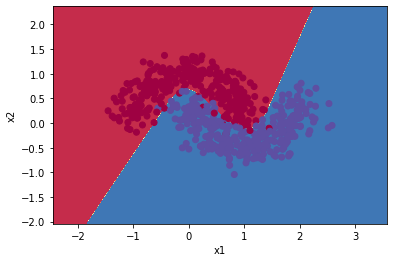

In [61]:
# Define função para fazer gráfico da fronteira de decisão
def plot_decision_boundary(model, **args):
    # Recupera dados de entrada da função
    X = args["X"]
    Y = args["Y"]
    W1 = args["W1"]
    b1 = args["b1"]
    W2 = args["W2"]
    b2 = args["b2"]
    
    # Define limites para o gráfico
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    
    # Gera malha com pontos distanciados de h
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = np.c_[xx.ravel(), yy.ravel()].T
    
    # Calcula função predict para todos os pontos ds malha    
    Z = model(W1, b1, W2, b2, XX)
    Z = Z.reshape(xx.shape)
    
    # Faz os gráficos do contorno da fronteira e dos exemplso de treinamento
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)    

# Executa função plot_decision_boundary
plot_decision_boundary(predict, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
print("Fronteira de decisão da RNA de uma camada escondida com número de neurônios igual a: " + str(4))

### Exercício #11:

Implemente na célula abaixo o cálculo da exatidão obtida para todos os exemplos de treinamento.  A equação que implementa o cálculo da exatidão éa seguinte:

$$ exatidão = 100*(1 - \frac{1}{m}\sum_{i=1}^{m} |y_{real}^{(i)} - y_{previsto}^{(i)}|) $$

Use as funções `np.abs` e `np.sum` para calcular o módulo de um número e a somatória dos elementos de um vetor.

Cuidado com as dimensões das previsões e do vetor de saídas `Y`.

In [62]:
# PARA VOCÊ FAZER: Calculo da exatidão

# Calcule as previsões da rede usando a função predict
predictions = predict(W1, b1, W2, b2, X)

# Calcule a exatidão obtida pela rede. Para acertar as dimensões use o transposto de predictions
exatidao = 100* (1 - np.sum(np.abs(Y - predictions.T)) /m)

print('Exatidão: ' + str(exatidao) + ' %')

Exatidão: 98.0 %


**Saída esperada**: 

    Exatidão: 98.0 %

Por esse resultado podemos conlcuir que a RNA foi capaz de aprender o padrão de luas! Redes neurais são capazes de aprender fronteiras de decisão muito complexas e não lineares, mesmo com poucos neurônios. 

Você sabe como calcular o número total de parâmetros dessa RNA?

### 4.4 - Ajuste do número de neurônios da camada escondida ###

Agora, tente outros números de neurônios na camada escondida. Para isso, execute o seguinte programa. Pode levar alguns minutos para executar. Você deve observar comportamentos diferentes para cada número de neurônios na camada escondida.

A execução dessa célula vai demorar alguns minutos.

Exatidão para 2 neurônios: 86.83333333333334 %
Exatidão para 3 neurônios: 98.16666666666667 %
Exatidão para 4 neurônios: 98.0 %
Exatidão para 5 neurônios: 98.0 %
Exatidão para 20 neurônios: 97.16666666666667 %
Exatidão para 40 neurônios: 86.5 %


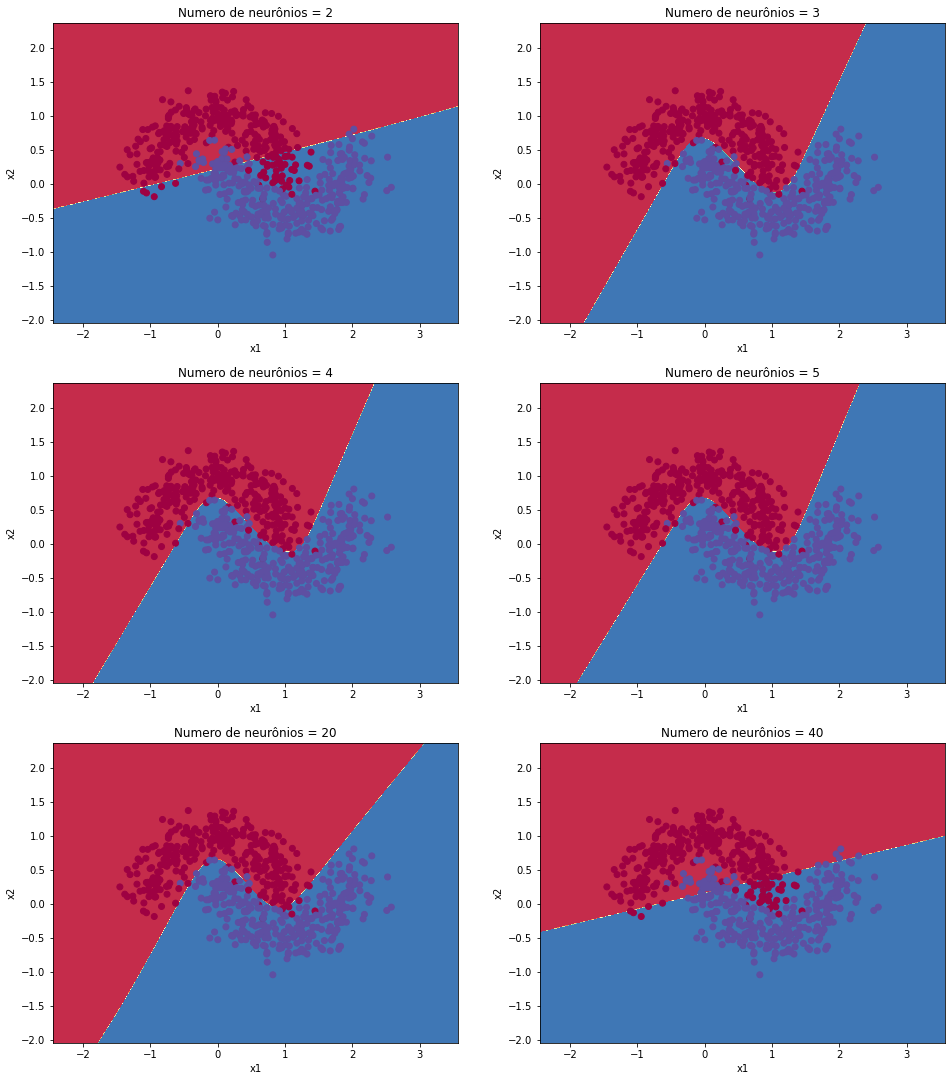

In [63]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [2, 3, 4, 5, 20, 40]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Numero de neurônios = %d' % n_h)
    W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 2000)
    plot_decision_boundary(predict, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
    predictions = predict(W1, b1, W2, b2, X)
    exatidao = 100*(1-np.sum(np.abs(Y-predictions.T))/m)
    print ("Exatidão para {} neurônios: {} %".format(n_h, exatidao))

**Saída esperada:**

    Exatidão para 2 neurônios: 86.83333333333334 %
    Exatidão para 3 neurônios: 98.16666666666667 %
    Exatidão para 4 neurônios: 98.0 %
    Exatidão para 5 neurônios: 98.0 %
    Exatidão para 20 neurônios: 97.16666666666667 %
    Exatidão para 40 neurônios: 86.5 

**Interpretação**:
- Quanto maior a RNA (maior o número de neurônios) melhor o seu desempenho para aprender os dados de treinamento, até que eventualmente um modelo muito grande apresenta sobre-ajuste dos dados. 
- O melhor número de camadas escondidas parece ser algo em torno de n_h igual a 3 e 4.
- Veremos com mais detalhes como desenvolver RNAs grandes sem problemas de sobre-ajuste dos dados. 

### 4.5 - Desempenho com outros padrões de dados

### Exercício #12:

Treine novamente a sua RNA para cada um dos seguintes conjunto de dados. Após o treinamento execute a RNA para calcular as suas previsões e a sua exatidão. 

Primeiramente execute a célula abaixo para gerar todos os padrões de dados.

In [64]:
# Define função para carregar padrões de pontos no plano
def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

# Conjunto de dados
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

Para treinar a sua RNA com outros padrões de pontos, modifique o programa abaixo para cada conjunto de dados de cada vez. Use 3001 épocas para cada padrão de dados.

Dica: use como base parte do programa do item 4.4.

### Noisy Circles

Exatidão para 5 neurônios: 92.33333333333333 %


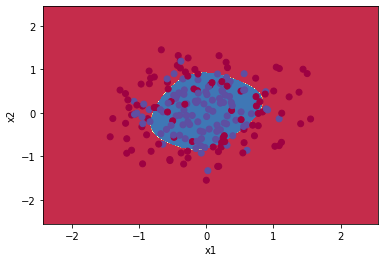

In [65]:
# PARA VOCÊ FAZER: treinar e executar modelo com outros conjuntos de dados

# Seleciona dataset
dataset = 'noisy_circles'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualização dos dados
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

# Número de neurônios da camada escondida
n_h = 5

# Calcula parâmetros, mostra fronteira de decisão, calcula previsões e exatidão
W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 3001)
plot_decision_boundary(predict, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
predictions = predict(W1, b1, W2, b2, X)
exatidao = 100*(1-np.sum(np.abs(Y-predictions.T))/m)

print ("Exatidão para {} neurônios: {} %".format(n_h, exatidao))

### Noisy Moons

Exatidão para 5 neurônios: 99.33333333333333 %


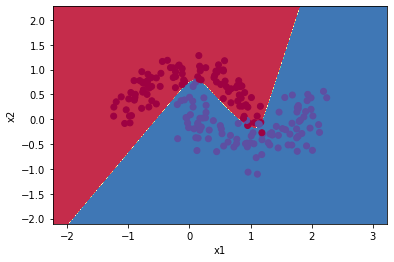

In [66]:
# PARA VOCÊ FAZER: treinar e executar modelo com outros conjuntos de dados

# Seleciona dataset
dataset = 'noisy_moons'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualização dos dados
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

# Número de neurônios da camada escondida
n_h = 5

# Calcula parâmetros, mostra fronteira de decisão, calcula previsões e exatidão
W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 3001)
plot_decision_boundary(predict, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
predictions = predict(W1, b1, W2, b2, X)
exatidao = 100*(1-np.sum(np.abs(Y-predictions.T))/m)

print ("Exatidão para {} neurônios: {} %".format(n_h, exatidao))

### Blobs

Exatidão para 5 neurônios: 94.33333333333334 %


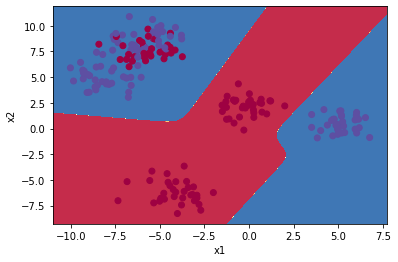

In [67]:
# PARA VOCÊ FAZER: treinar e executar modelo com outros conjuntos de dados

# Seleciona dataset
dataset = 'blobs'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualização dos dados
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

# Número de neurônios da camada escondida
n_h = 5

# Calcula parâmetros, mostra fronteira de decisão, calcula previsões e exatidão
W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 3001)
plot_decision_boundary(predict, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
predictions = predict(W1, b1, W2, b2, X)
exatidao = 100*(1-np.sum(np.abs(Y-predictions.T))/m)

print ("Exatidão para {} neurônios: {} %".format(n_h, exatidao))

### Gaussian Quantiles

Exatidão para 5 neurônios: 98.0 %


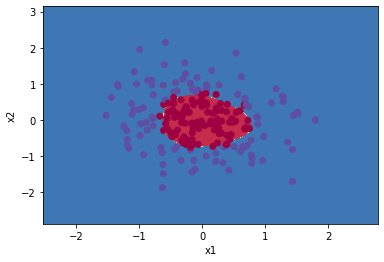

In [68]:
# PARA VOCÊ FAZER: treinar e executar modelo com outros conjuntos de dados

# Seleciona dataset
dataset = 'gaussian_quantiles'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualização dos dados
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

# Número de neurônios da camada escondida
n_h = 5

# Calcula parâmetros, mostra fronteira de decisão, calcula previsões e exatidão
W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 3001)
plot_decision_boundary(predict, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
predictions = predict(W1, b1, W2, b2, X)
exatidao = 100*(1-np.sum(np.abs(Y-predictions.T))/m)

print ("Exatidão para {} neurônios: {} %".format(n_h, exatidao))

**Saídas esperadas:** 

    noyse_circles exatidão 80,5%
    bloobs: exatidão 83,0%
    gaussian_quantiles: exatidão 99,0%


<font color='blue'>
    
**O que você aprendeu nesse trabalho:**

- Construir uma RNA de uma única camada intermediária
- Implementar a propagação para frente e a retro propagação
- Treinar uma RNA
- Observar o impacto de variar o número de neurônios da camada intermediária